In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
font = {'family' : 'Arial',
       'weight': 'light',
       'size': 11}

plt.rc('font', **font)

SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 18
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)

In [3]:
df = pd.read_csv("q1.csv")

In [4]:
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27820 rows x 12 columns]

In [5]:
tot_suicides=df.groupby(by=["country", "year"])["suicides_no"].sum()
avg_suicides_yearly = tot_suicides.groupby("country").mean()

In [6]:
top_countries = avg_suicides_yearly.sort_values(ascending=False)[:6].keys()

In [7]:
top_countries

Index(['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany',
       'France'],
      dtype='object', name='country')

In [8]:
tot_suicides_yearly = df.groupby(by=["country", "year"])["suicides_no"].sum()

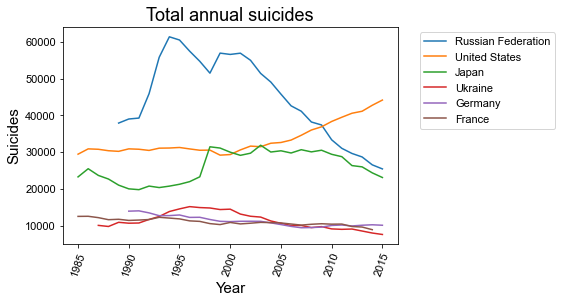

In [9]:
for c in top_countries:
    data = tot_suicides_yearly.loc[c]
    x=data.index.get_level_values('year')
    fig = sns.lineplot(y=data.values, x=x, palette="rainbow", label=c)
    plt.xticks(rotation="70")
fig.set_title('Total annual suicides')
fig.set(ylabel="Suicides", xlabel="Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# US has seen a steady rise in suicide rates
# whereas Russia has seen a fall

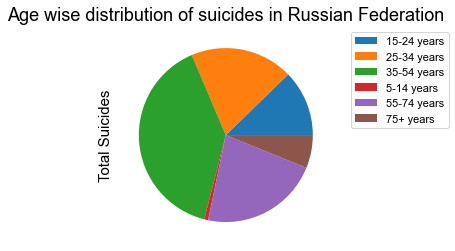

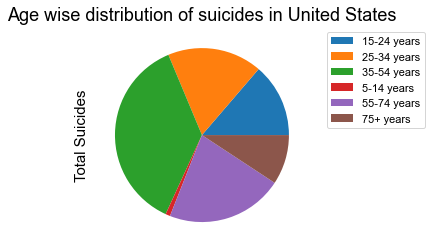

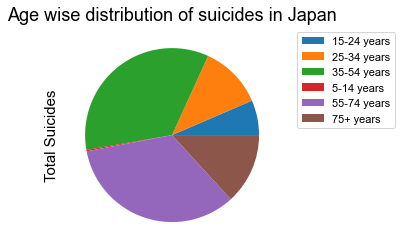

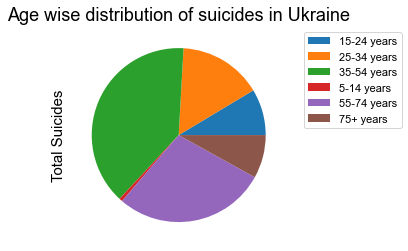

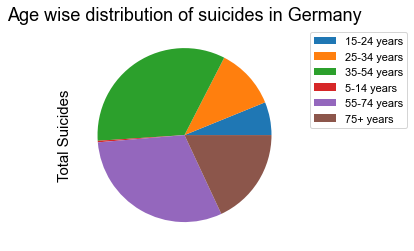

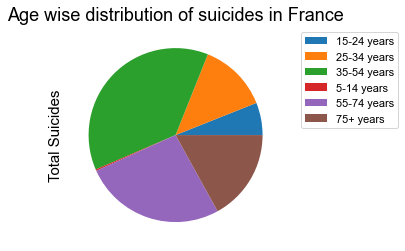

In [11]:
tot_suicides_age = df.groupby(by=["country", "age"])["suicides_no"].sum()
for c in top_countries:
    data = tot_suicides_age.loc[c]
    ages = data.index.get_level_values('age').unique()
    ax=pd.DataFrame(data.values, index=data.index.get_level_values('age')).plot.pie(y=0,
                                                                                    labeldistance=None)
    ax.set_title("Age wise distribution of suicides in "+c)
    ax.set(ylabel="Total Suicides")
    ax.tick_params(axis='y', pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [12]:
# 5 to 14 age group has the smallest contribution for all countries
# 35 to 54 age group has the largest contribution for all countries, followed by 55 to 74
# France and Germany hves unexpectedly large contribution from 75+ age group

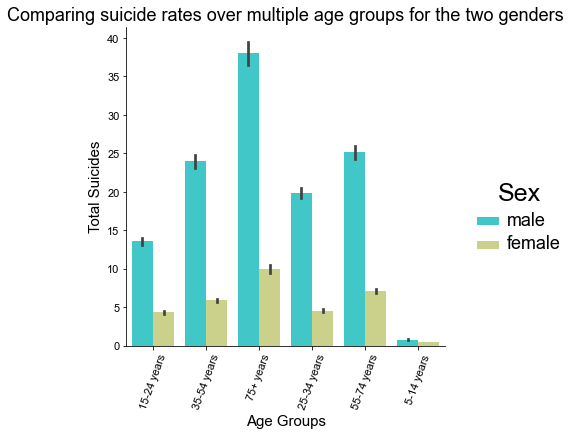

In [13]:
ax = sns.catplot(x="age", y="suicides/100k pop", hue="sex", kind = 'bar', data=df, palette = "rainbow")
axes = ax.axes.flatten()
axes[0].set_title("Comparing suicide rates over multiple age groups for the two genders")
axes[0].set_ylabel("Total Suicides")
axes[0].set_xlabel("Age Groups")
plt.xticks(rotation="70")
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.setp(ax._legend.get_texts(), fontsize=BIGGER_SIZE) # for legend text
ax._legend.set_title("Sex")
plt.setp(ax._legend.get_title(), fontsize=BIGGER_SIZE+7) # for legend title

plt.show()

In [14]:
# across all ages, females have significantly lower suicides rates

In [15]:
tot_suicides_gen_year = df.groupby(by=["generation", "year"])["suicides_no"].sum()

In [16]:
all_gens=tot_suicides_gen_year.index.get_level_values('generation').unique()

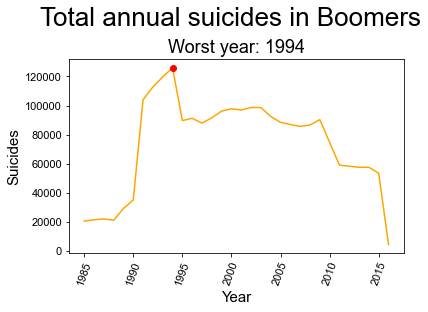

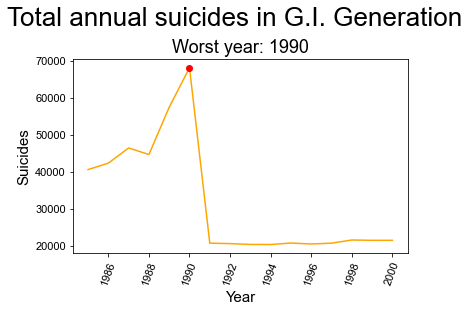

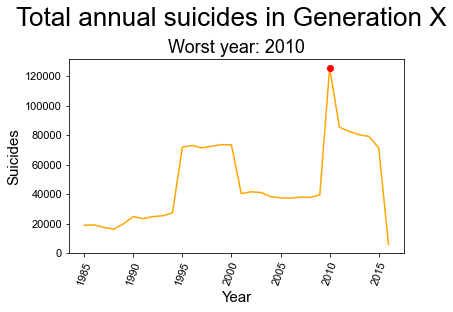

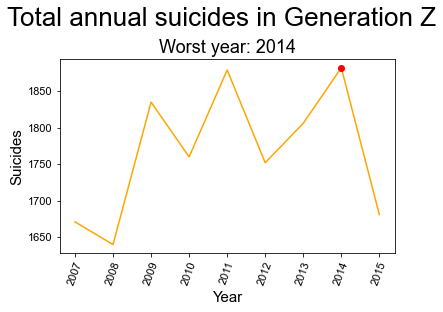

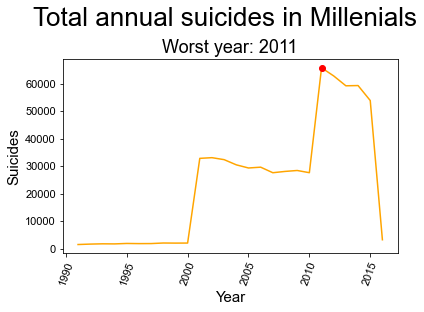

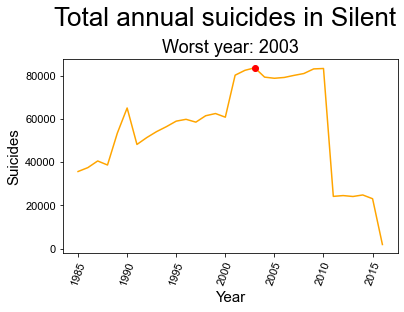

In [17]:
for g in all_gens:
    data = tot_suicides_gen_year.loc[g]
    x=data.index.get_level_values('year')
    year_max=x[data.values.argmax()]
    s_max=data.values.max()
    fig = sns.lineplot(y=data.values, x=x, color='orange')
    plt.plot(year_max, s_max, "ro")
    plt.suptitle('Total annual suicides in ' + g, fontsize=26)
    plt.subplots_adjust(top=0.8)
    fig.set_title("Worst year: "+ str(year_max))
    fig.set(ylabel="Suicides", xlabel="Year")
    plt.xticks(rotation="70")
    plt.show()

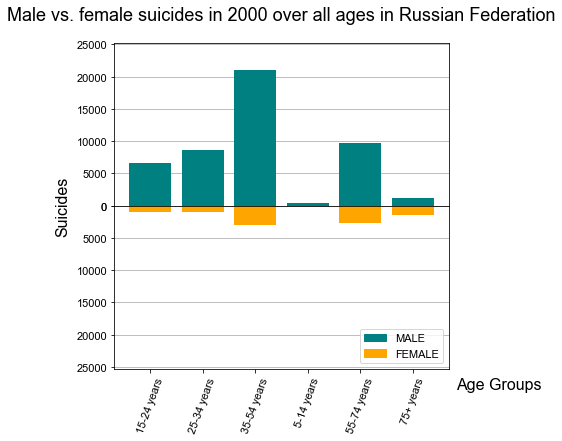

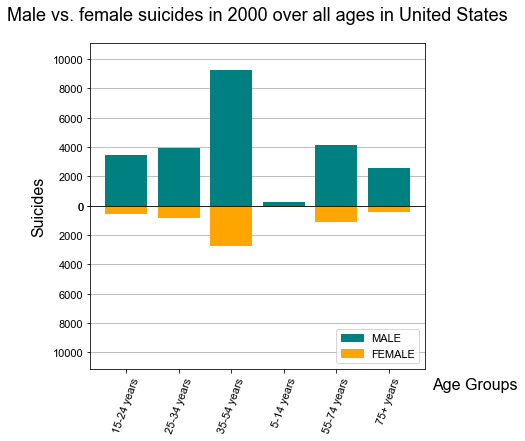

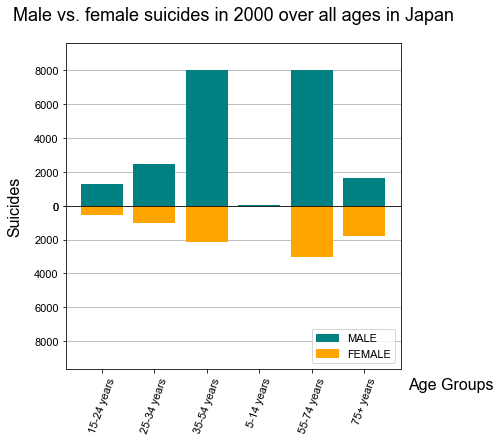

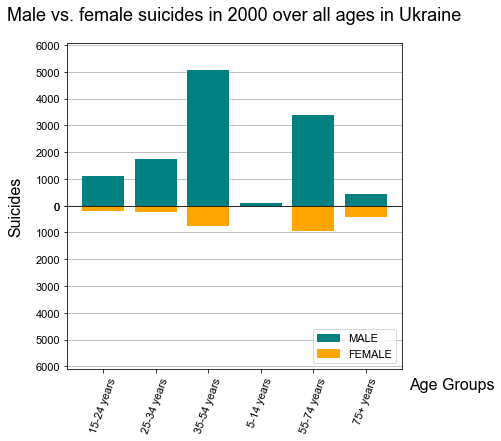

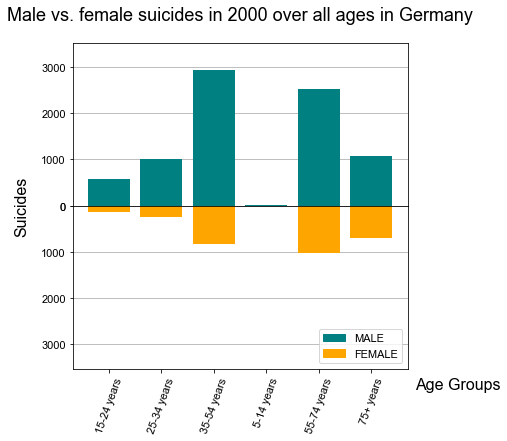

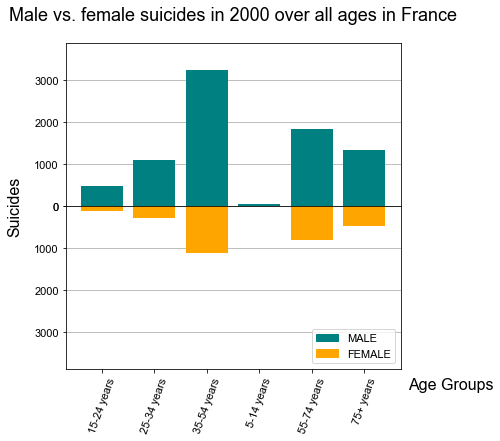

In [18]:
import matplotlib.patches as mpatches
tot_suicides_age_sex = df.loc[df["year"]==2000].groupby(by=["country", "age", "sex"])["suicides_no"].sum()
for c in top_countries:
    data = tot_suicides_age_sex.loc[c]
    female = data.loc[data.index.get_level_values('sex')=="female"]
    male = data.loc[data.index.get_level_values('sex')=="male"]
    d = {"male": male, "female": female, "max": max(male.max(), female.max())}

    bins = np.arange(-20,40)

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,6))

    bins = np.arange(-20,40)
    patches=[]

    for ax, column, color, invert in zip(axes.ravel(), d.keys(), ['teal', 'orange'],  [False,True]):
        bar = ax.bar(d[column].index.get_level_values('age'), d[column], color=color)
        bar.set_label(column.upper())
        ax.set_ylim(0, d["max"]*1.2)
        
        ax.set_axisbelow(True)
        ax.yaxis.grid(True)
        plt.xticks(rotation="70")
        patches.append(mpatches.Patch(color=color, label=column.upper()))

        if invert:
            ax.invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title("Male vs. female suicides in 2000 over all ages in "+ c, y=2.1
             )
    plt.ylabel('Suicides', fontsize=16)
    plt.xlabel('Age Groups', fontsize=16)
    plt.gca().yaxis.set_label_coords(-0.13, 1)
    plt.gca().xaxis.set_label_coords(1.15, -0.05)

    plt.legend(handles=patches, loc="lower right")
    plt.show()

In [19]:
"""
In general, female suicides are substantially lower than male ones
Ukraine and Russia have even lower female suicide rates in general
"""

'\nIn general, female suicides are substantially lower than male ones\nUkraine and Russia have even lower female suicide rates in general\n'

In [20]:
countries=df[["country", "population", "HDI for year", "suicides_no"]].dropna()["country"].unique()
dict_suicides={}
dict_hdi={}
dict_pop={}
for c in countries:
    dict_suicides[c]=df[df["country"]==c]["suicides_no"].sum()
    dict_hdi[c]=df[df["country"]==c]["HDI for year"].mean()
    dict_pop[c]=df[df["country"]==c]["population"].sum()

In [21]:
main_dict={}
for c in dict_suicides.keys():
    main_dict[c] = {"suicides": dict_suicides[c], "hdi": dict_hdi[c], "pop": dict_pop[c]}
df_new=pd.DataFrame(main_dict).T

In [22]:
cb_pop=np.cbrt(df_new["pop"])

In [23]:
sui_rate=df_new["suicides"]/df_new["pop"]

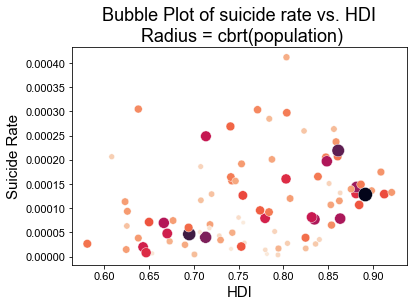

In [24]:
g = sns.scatterplot(y=sui_rate, x=df_new["hdi"], size=cb_pop, hue=cb_pop, sizes=(20, 200), palette="rocket_r")
g.legend_.remove()
g.set(xlabel='HDI', ylabel='Suicide Rate')
plt.title("Bubble Plot of suicide rate vs. HDI\n Radius = cbrt(population)");

In [25]:
# considering larger bubbles as more significant,
# we see that suicide rate increases with HDI